In [7]:
import pandas as pd
import matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt

def load_data():   
    # Read the input data from CSV.
    data = pd.read_csv('Data/pol_regression.csv', usecols=[1,2])

    # Sort both train and test data by the X value to avoid plotting errors later.
    dataTrain = np.sort(data.values, axis=0)

    # Get the training X and Y values into arrays.
    xTrainSet = dataTrain[:, 0]
    yTrainSet = dataTrain[:, 1]
    
    return xTrainSet, yTrainSet

def load_train_test_data():   
    # Read the input data from CSV.
    data = pd.read_csv('Data/pol_regression.csv', usecols=[1,2])

    # Get a sample of the data to use as the training set.
    dataTrain = data.sample(frac=0.7)

    # Use the other portion on the data as the testing set.
    dataTest = data.drop(dataTrain.index)

    # Sort both train and test data by the X value to avoid plotting errors later.
    dataTrain = np.sort(dataTrain.values, axis=0)
    dataTest = np.sort(dataTest.values, axis=0)

    # Get the training X and Y values into arrays.
    xTrainSet = dataTrain[:, 0]
    yTrainSet = dataTrain[:, 1]

    # Get the testing X and Y values into arrays.
    xTestSet = dataTest[:, 0]
    yTestSet = dataTest[:, 1]
    return xTrainSet, yTrainSet, xTestSet, yTestSet


In [8]:
import numpy.linalg as linalg

# Polynomial Expansion to expand the input to the
# given polynomial degree.
def getPolynomialDataMatrix(x, degree):
    X = np.ones(x.shape)
    for i in range(1,degree + 1):
        X = np.column_stack((X, x ** i))
    return X

# Get the weights for the given input and degree.
def pol_regression(x, y, degree):
    X = getPolynomialDataMatrix(x, degree)

    XX = X.transpose().dot(X)
    if degree == 0:
        return XX
    w = np.linalg.solve(XX, X.transpose().dot(y))
    return w

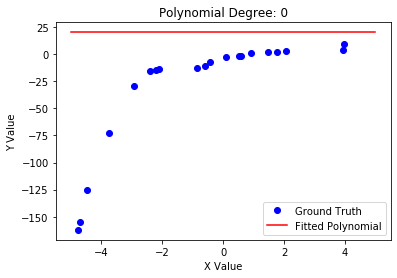

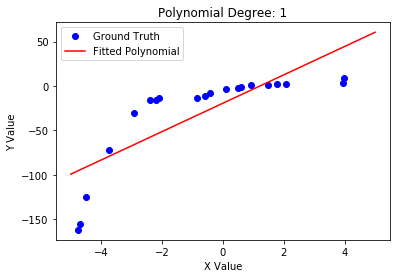

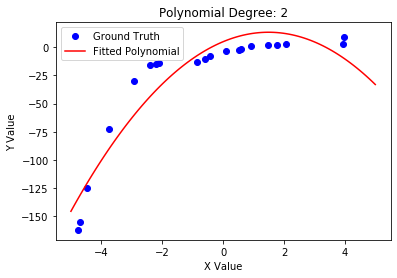

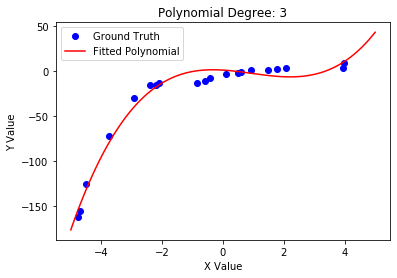

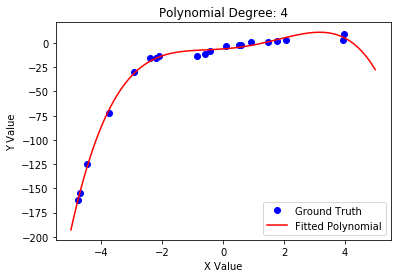

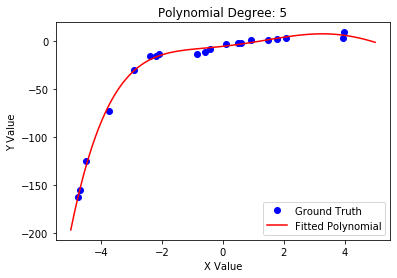

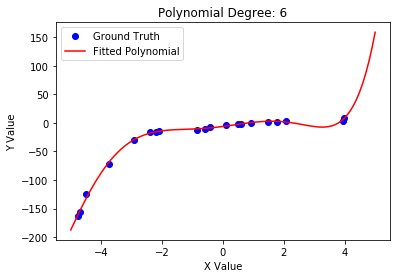

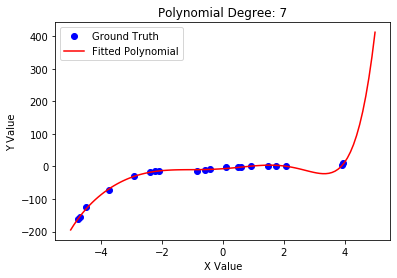

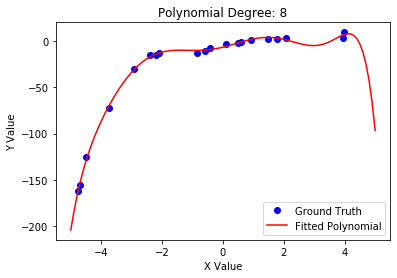

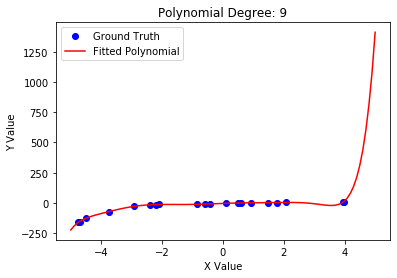

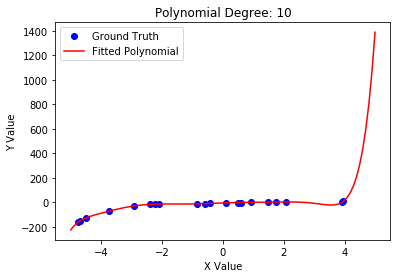

In [17]:
# Section 1.2
def pol_regression_plot():
    xTrain, yTrain = load_data()    
    degreesToUse = range(0, 11)    
    # Generate some linspace data for plotting nice curves
    linSpaceData = np.linspace(-5, 5, 100)
        
    for degree in degreesToUse:        
        # Fit the model.
        weights = pol_regression(xTrain, yTrain, degree)
        
        # Predict using the trained model.
        xTestMatrix = getPolynomialDataMatrix(linSpaceData, degree)
        
        yHat = xTestMatrix.dot(weights)
    
        # Plot the ground truth data.
        plt.plot(xTrain, yTrain, 'bo')
        # Plot the predictions.
        plt.plot(linSpaceData, yHat, 'r')
        plt.title("Polynomial Degree: " + str(degree))
        plt.legend(('Ground Truth', 'Fitted Polynomial'))
        plt.ylabel('Y Value')
        plt.xlabel('X Value')
        plt.show()
        
        
pol_regression_plot()
    

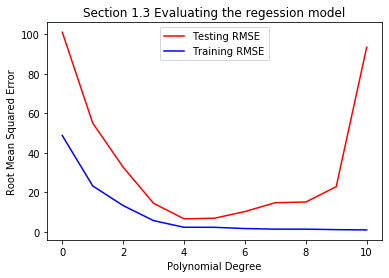

In [21]:
def Rmse(predictions, targets):
    # Calculate Root Mean Square Error.
    return np.sqrt(((predictions-targets) ** 2).mean())

def pol_regression_eval():
    # Load data.
    xTrain, yTrain, xTest, yTest = load_train_test_data()
    
    degreesToUse = range(0, 11)
    testRmseValues = []
    trainRmseValues = []
    
    for degree in degreesToUse:        
        # Fit the model.
        weights = pol_regression(xTrain, yTrain, degree)
        
        # Predict using the trained model and test data.
        xTestMatrix = getPolynomialDataMatrix(xTest, degree)
        yHat = xTestMatrix.dot(weights)
        
        # Calculate test RMSE.
        testRmseValues.append(Rmse(yHat, yTest))
        
        # Predict using the trained model and training data.
        xTrainMatrix = getPolynomialDataMatrix(xTrain, degree)
        yHatTrain = xTrainMatrix.dot(weights)
        
        # Calculate train RMSE.
        trainRmseValues.append(Rmse(yHatTrain, yTrain))
    
    # Plot RMSE values.
    plt.title('Section 1.3 Evaluating the regession model')
    plt.plot(degreesToUse, testRmseValues, 'r-')
    plt.plot(degreesToUse, trainRmseValues, 'b-')
    plt.legend(('Testing RMSE', 'Training RMSE'))
    plt.xlabel('Polynomial Degree')
    plt.ylabel('Root Mean Squared Error')

pol_regression_eval()

In [3]:
import pandas as pd
import matplotlib.pyplot
import numpy as np
import matplotlib.pyplot as plt
import random
import math

def computeEuclideanDistance(v1, v2):
    # Calculate Euclidean Distance.
    return np.sqrt(np.sum((v1-v2)**2))

def loadDogData():
    # Load csv data.
    data = pd.read_csv("Data/dog_breeds.csv")
    heights = data['height'].values
    tailLengths = data['tail length'].values
    legLengths = data['leg length'].values
    noseCircumferences = data['nose circumference'].values
    return np.array(heights), np.array(tailLengths), np.array(legLengths), np.array(noseCircumferences)

def initialiseCentroids(xData, yData, k):
    # Get the X data min and max.
    xMin = xData.min()
    xMax = xData.max()
    
    # Get the Y data min and max.
    yMin = yData.min()
    yMax = yData.max()
    
    centroids = []
    # Iterate through the number of centroids required.
    for i in range(k):
        # Get a random X and Y value for the centroid, between the min and max.
        centroidX = random.uniform(xMin, xMax)
        centroidY = random.uniform(yMin, yMax)
        centroids.append(np.array([centroidX, centroidY]))
    return np.array(centroids)

def computeCentroids(clusteredPoints, k):
    centroids = []    
    # Iterate through the centroids.
    for cluster in range(len(clusteredPoints)):
        # Get the points in this cluster.
        pointsInCluster = np.array(clusteredPoints[cluster])
        xMean = 0
        yMean = 0
        # Get the means if it has points.
        if(len(pointsInCluster) > 0):
            xMean = pointsInCluster[:,0].mean()
            yMean = pointsInCluster[:,1].mean()
        # Use the means as the coordinates for the centroids.    
        centroids.append(np.array([xMean, yMean]))
    return np.array(centroids)

def determineConvergence(newCentroids, oldCentroids):
    # Determine if the new centroids have moved from their previous position.
    # Iterate through the centroids.
    for centroidIndex in range(len(newCentroids)):
        # Get distances between the old and new centroid.
        dist = computeEuclideanDistance(newCentroids[centroidIndex], oldCentroids[centroidIndex])
        
        # Is the distance bigger than zero?
        if(dist > 0):
            # Yes, it has not converged yet.
            return False
    return True

def kMeans(points, k):
    # Initialise centroids to random positions.
    centroids = initialiseCentroids(points[:, 0], points[:,1], k)
    converged = False
    runCount = 0
    distances = []
    while not converged:
        # Assign points to clusters.
        clusteredPoints = assignPointsToClusters(points, centroids)
        # Compute aggregate distance.
        aggregateDistance = computeAggregateDistance(clusteredPoints, centroids)
        distances.append(aggregateDistance)
        # Recompute Centroids.
        newCentroids = computeCentroids(clusteredPoints, k)
        # Determine if it has converged.
        converged = determineConvergence(newCentroids, centroids)
        centroids = newCentroids    
        runCount += 1   
    return clusteredPoints, centroids, distances, runCount

def plotKMeansResults(clusteredPoints, centroids, title, xlabel, ylabel):
    # Plot.
    plt.figure()
    clusterIndex = 0
    # Iterate the clusters.
    for cluster in clusteredPoints:
        # Plot the points in the cluster as a new colour.
        npCluster = np.array(cluster)
        if(len(npCluster) > 0):
            plt.scatter(npCluster[:, 0], npCluster[:, 1])
        clusterIndex += 1
    # Plot the cluster centroids in black.
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
def assignPointsToClusters(points, centroids):
    clusteredPoints = []
    # Iterate the centroids to generate another dimension on the
    # clusteredPoints array of the appropriate size.
    for i in range(len(centroids)):
        clusteredPoints.append([])

    # Iterate points.
    for point in points:
        # Find nearest centroid.
        nearestIdx = getNearestCentroidIndex(point, centroids)
        # Assign the point to this cluster.
        clusteredPoints[nearestIdx].append(point)
    return np.array(clusteredPoints)
                         
def getNearestCentroidIndex(point, centroids):
    currentCentroidIndex = 0
    nearestCentroidIndex = 0
    # Initialise the nearestDistance to positive infinity to ensure that the
    # first calculated distance is always smaller.
    nearestDistance = math.inf    
    for centroid in centroids:
        # Get distance to this centroid.
        dist = computeEuclideanDistance(point, centroid)
        # Is the distance smaller than the smallest distance found so far?
        if (dist < nearestDistance):
            # Yes, This is the new nearest centroid.
            nearestCentroidIndex = currentCentroidIndex
            nearestDistance = dist
        currentCentroidIndex += 1
    return nearestCentroidIndex

def computeAggregateDistance(clusteredPoints, centroids):
    # Total aggregate distance.
    aggregateDistance = 0
    # Iterate through the clusters (centroids).
    for cl in range(len(centroids)):
        clusterSum = 0
        # Get all points in cluster cl.
        pointsInCluster = np.array(clusteredPoints[cl])
        # Iterate through all those points.
        for point in pointsInCluster:
            # Compute the distance between this point and the centroid of its cluster.
            dist = computeEuclideanDistance(centroids[cl], point)
            # Add the distance to the sum for this cluster.
            clusterSum += dist
        # Add the sum of distances for the cluster to the total sum.
        aggregateDistance += clusterSum
    return aggregateDistance

def plotAggregateDistanceOverIterations(distances, runCount, k):
    plt.figure()
    # Plot the iteration count against the aggregate distance values.
    plt.plot(range(1, runCount+1), distances, 'b')
    plt.title('Aggregate Distance per iteration for K = ' + str(k))
    plt.xlabel('Iteration Step')
    plt.ylabel('Aggregate distance')
    plt.show()
    

def runKMeans(ks=[2,3]):
    heights, tails, legs, noses = loadDogData()
    
    for k in ks:
        # Run for heights and tails.
        clusteredPoints, centroids,distances, runCount = kMeans(np.column_stack((heights, tails)), k)
        # Plot results.
        plotKMeansResults(clusteredPoints, centroids, 'K = ' + str(k), 'Height', 'Tail Length')
        plotAggregateDistanceOverIterations(distances, runCount, k)
        
        # Run for heights and Legs.
        clusteredPoints, centroids,distances, runCount = kMeans(np.column_stack((heights, legs)), k)
        # Plot results.
        plotKMeansResults(clusteredPoints, centroids, 'K = ' + str(k), 'Height', 'Leg Length')
        plotAggregateDistanceOverIterations(distances, runCount, k)

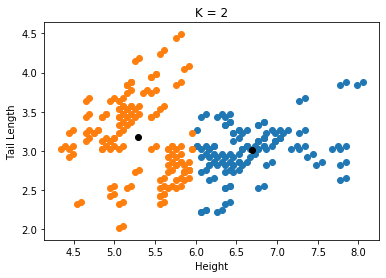

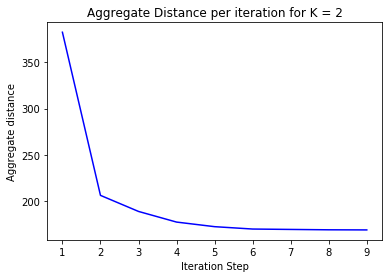

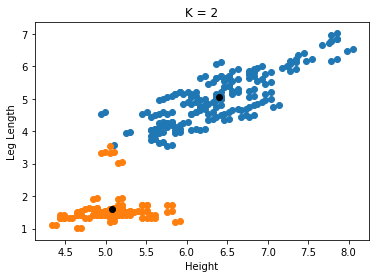

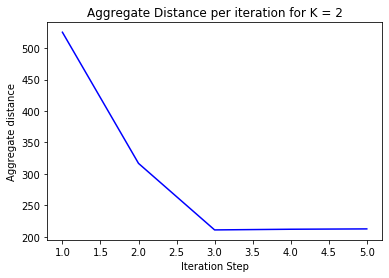

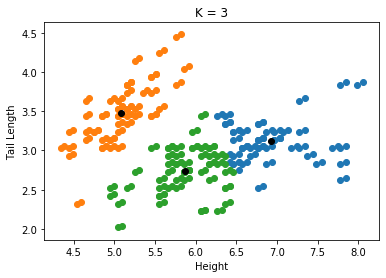

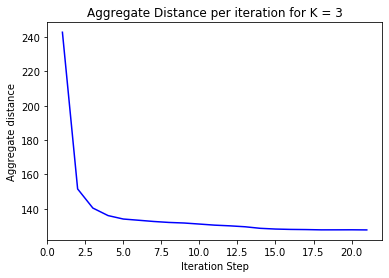

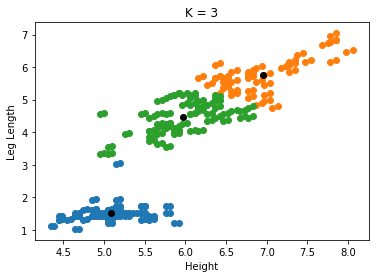

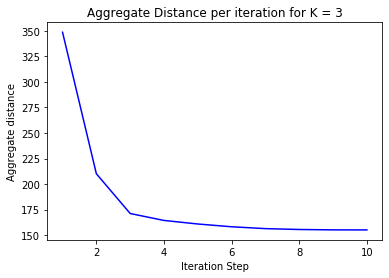

In [5]:
runKMeans()